In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns


In [2]:
tesla_stock_price = "tesla_stock_price.csv"
elonmusk_tweets = "elonmusk_tweets.csv"

In [3]:
tesla_stock_price_data = pd.read_csv(tesla_stock_price)
elonmusk_tweets = pd.read_csv(elonmusk_tweets)

tesla_stock_price_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
new_stock_data = tesla_stock_price_data[['Date','Open','Close']]
new_stock_data.head()

,Date,Open,Close
0,6/29/2010,19.000000,23.889999
1,6/30/2010,25.790001,23.830000
2,7/1/2010,25.000000,21.959999
3,7/2/2010,23.000000,19.200001
4,7/6/2010,20.000000,16.110001


In [5]:
daily_change = round(tesla_stock_price_data["Close"]-tesla_stock_price_data["Open"],2)
daily_change.head()

0    4.89
1   -1.96
2   -3.04
3   -3.80
4   -3.89
dtype: float64

In [6]:
daily_percent_change = round((tesla_stock_price_data["Close"]-tesla_stock_price_data["Open"])/tesla_stock_price_data["Open"]*100,2)
daily_percent_change.head()

0    25.74
1    -7.60
2   -12.16
3   -16.52
4   -19.45
dtype: float64

In [7]:
update_stock_data = pd.DataFrame({
    "date": tesla_stock_price_data.Date,
    "open": tesla_stock_price_data.Open,
    "close": tesla_stock_price_data.Close,
    "daily change": daily_change,
    "percentage change": daily_percent_change
})
update_stock_data.head()

,date,open,close,daily change,percentage change
0,6/29/2010,19.000000,23.889999,4.89,25.74
1,6/30/2010,25.790001,23.830000,-1.96,-7.60
2,7/1/2010,25.000000,21.959999,-3.04,-12.16
3,7/2/2010,23.000000,19.200001,-3.80,-16.52
4,7/6/2010,20.000000,16.110001,-3.89,-19.45


In [8]:
# elonmusk_tweets.head()

In [9]:
daily_tweet_counts=elonmusk_tweets.groupby(['created_at']).count()
# daily_tweet_counts.head()

In [10]:
tweet_count = pd.DataFrame({
    "Tweet Date": daily_tweet_counts.index,
    "Tweet Count": daily_tweet_counts.text})
# tweet_count.head()

In [11]:
merged_df = pd.merge(update_stock_data, tweet_count, how="left",left_on="date",right_on="Tweet Date")
merged_df.head()

,date,open,close,daily change,percentage change,Tweet Date,Tweet Count
0,6/29/2010,19.000000,23.889999,4.89,25.74,NaN,NaN
1,6/30/2010,25.790001,23.830000,-1.96,-7.60,NaN,NaN
2,7/1/2010,25.000000,21.959999,-3.04,-12.16,NaN,NaN
3,7/2/2010,23.000000,19.200001,-3.80,-16.52,NaN,NaN
4,7/6/2010,20.000000,16.110001,-3.89,-19.45,NaN,NaN


In [12]:
merged_df = merged_df.fillna(value=0)
merged_df.fillna(value=0).head()

,date,open,close,daily change,percentage change,Tweet Date,Tweet Count
0,6/29/2010,19.000000,23.889999,4.89,25.74,0,0.0
1,6/30/2010,25.790001,23.830000,-1.96,-7.60,0,0.0
2,7/1/2010,25.000000,21.959999,-3.04,-12.16,0,0.0
3,7/2/2010,23.000000,19.200001,-3.80,-16.52,0,0.0
4,7/6/2010,20.000000,16.110001,-3.89,-19.45,0,0.0


In [13]:
production_db = merged_df.drop(columns=['Tweet Date'])

production_db.head()
# production_db.dtypes


,date,open,close,daily change,percentage change,Tweet Count
0,6/29/2010,19.000000,23.889999,4.89,25.74,0.0
1,6/30/2010,25.790001,23.830000,-1.96,-7.60,0.0
2,7/1/2010,25.000000,21.959999,-3.04,-12.16,0.0
3,7/2/2010,23.000000,19.200001,-3.80,-16.52,0.0
4,7/6/2010,20.000000,16.110001,-3.89,-19.45,0.0


In [14]:
# Change "date" column to datetime data type. Now it displays the time along with the date
production_db["date"]=pd.to_datetime(production_db.date)
# add column with year only, no month nor date
production_db['year']= production_db["date"].map(lambda x: x.year)
production_db['date_only']= production_db["date"].map(lambda x: x.date())
# filter 2017 data only 
production = production_db[production_db['year']>= 2017]


In [15]:
production.head()

,date,open,close,daily change,percentage change,Tweet Count,year,date_only
1640,2017-01-03,214.860001,216.990005,2.13,0.99,0.0,2017,2017-01-03
1641,2017-01-04,214.750000,226.990005,12.24,5.70,0.0,2017,2017-01-04
1642,2017-01-05,226.419998,226.750000,0.33,0.15,1.0,2017,2017-01-05
1643,2017-01-06,226.929993,229.009995,2.08,0.92,1.0,2017,2017-01-06
1644,2017-01-09,228.970001,231.279999,2.31,1.01,0.0,2017,2017-01-09


In [16]:
production_db["date"]=pd.to_datetime(production_db.date)

production_db['year']= production_db["date"].map(lambda x: x.year)
production_db['date_only']= production_db["date"].map(lambda x: x.date())
production = production_db[production_db['year']>= 2017]

productionx = np.unique(production['Tweet Count'])

productionx

array([ 0.,  1.,  2.,  3.,  4.,  5.,  7.,  8.,  9., 10., 15.])

In [17]:
production.head()

,date,open,close,daily change,percentage change,Tweet Count,year,date_only
1640,2017-01-03,214.860001,216.990005,2.13,0.99,0.0,2017,2017-01-03
1641,2017-01-04,214.750000,226.990005,12.24,5.70,0.0,2017,2017-01-04
1642,2017-01-05,226.419998,226.750000,0.33,0.15,1.0,2017,2017-01-05
1643,2017-01-06,226.929993,229.009995,2.08,0.92,1.0,2017,2017-01-06
1644,2017-01-09,228.970001,231.279999,2.31,1.01,0.0,2017,2017-01-09


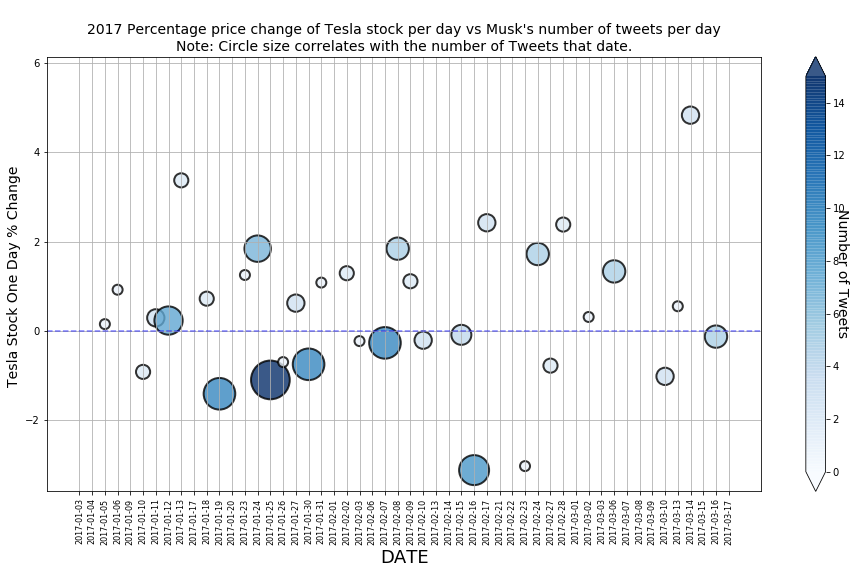

In [18]:
#x=date  y = tweet count    s=%change= size of the bubble
# Scatter Plot Temperature (F) vs. Latitude
fig, ax = plt.subplots(figsize=(16,8))

# plt.figure(figsize=(16,8))
x = np.arange(len(production))
s = production["Tweet Count"]
y = production["percentage change"]
colors = production["Tweet Count"]

# Change color with c and alpha. I map the color to the X axis value.
plot = plt.scatter(x, y, c=colors, s=s*100, cmap="Blues", alpha=0.8, edgecolors="black", linewidth=2)

plt.xticks(x,production["date_only"],rotation=90,fontsize=8)
plt.xlabel("DATE", fontsize=18)
plt.ylabel("Tesla Stock One Day % Change ", fontsize=14)
plt.title("\n2017 Percentage price change of Tesla stock per day vs Musk's number of tweets per day" + "\nNote: Circle size correlates with the number of Tweets that date.", fontsize=14)
plt.axhline(y=0,color='b', linestyle='--', alpha=0.5)
plt.grid() # vertical lines
cbar = plt.colorbar(plot, extend='both')   #display color bar
cbar.ax.set_ylabel('Number of Tweets', rotation=270, fontsize = 14)

# plt.ylim(-0.05, 0.06)
# plt.show()
plt.savefig("MuskPlot.png")



In [19]:
production_db = merged_df.drop(columns=['Tweet Date'])

production_db.head()
# production_db.dtypes


,date,open,close,daily change,percentage change,Tweet Count
0,6/29/2010,19.000000,23.889999,4.89,25.74,0.0
1,6/30/2010,25.790001,23.830000,-1.96,-7.60,0.0
2,7/1/2010,25.000000,21.959999,-3.04,-12.16,0.0
3,7/2/2010,23.000000,19.200001,-3.80,-16.52,0.0
4,7/6/2010,20.000000,16.110001,-3.89,-19.45,0.0


In [20]:
production_db["date"]=pd.to_datetime(production_db.date)

In [21]:
production.head()


,date,open,close,daily change,percentage change,Tweet Count,year,date_only
1640,2017-01-03,214.860001,216.990005,2.13,0.99,0.0,2017,2017-01-03
1641,2017-01-04,214.750000,226.990005,12.24,5.70,0.0,2017,2017-01-04
1642,2017-01-05,226.419998,226.750000,0.33,0.15,1.0,2017,2017-01-05
1643,2017-01-06,226.929993,229.009995,2.08,0.92,1.0,2017,2017-01-06
1644,2017-01-09,228.970001,231.279999,2.31,1.01,0.0,2017,2017-01-09


In [22]:
production_db['year']= production_db["date"].map(lambda x: x.year)
production_db['date_only']= production_db["date"].map(lambda x: x.date())

production['Tweet Count'].max()

15.0

In [25]:
production = production_db[production_db['year']>= 2016]
# production.plot(x='date',y='percentage change',figsize=(16,8))


In [243]:
production16 = production_db[production_db['year']>= 2016]
production16['day']= production_db["date"].map(lambda x: x.day)
# production_2016 = production16[production16['day']== '01']
production_2016

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,open,close,daily change,percentage change,Tweet Count,year,date_only,month
1388,2016-01-04,230.720001,223.410004,-7.31,-3.17,0.0,2016,2016-01-04,1
1389,2016-01-05,226.360001,223.429993,-2.93,-1.29,0.0,2016,2016-01-05,1
1390,2016-01-06,220.000000,219.039993,-0.96,-0.44,0.0,2016,2016-01-06,1
1391,2016-01-07,214.190002,215.649994,1.46,0.68,0.0,2016,2016-01-07,1
1392,2016-01-08,217.860001,211.000000,-6.86,-3.15,0.0,2016,2016-01-08,1
1393,2016-01-11,214.009995,207.850006,-6.16,-2.88,1.0,2016,2016-01-11,1
1394,2016-01-12,211.600006,209.970001,-1.63,-0.77,2.0,2016,2016-01-12,1
1395,2016-01-13,212.009995,200.309998,-11.70,-5.52,0.0,2016,2016-01-13,1
1396,2016-01-14,202.210007,206.179993,3.97,1.96,0.0,2016,2016-01-14,1
1397,2016-01-15,198.970001,204.990005,6.02,3.03,0.0,2016,2016-01-15,1


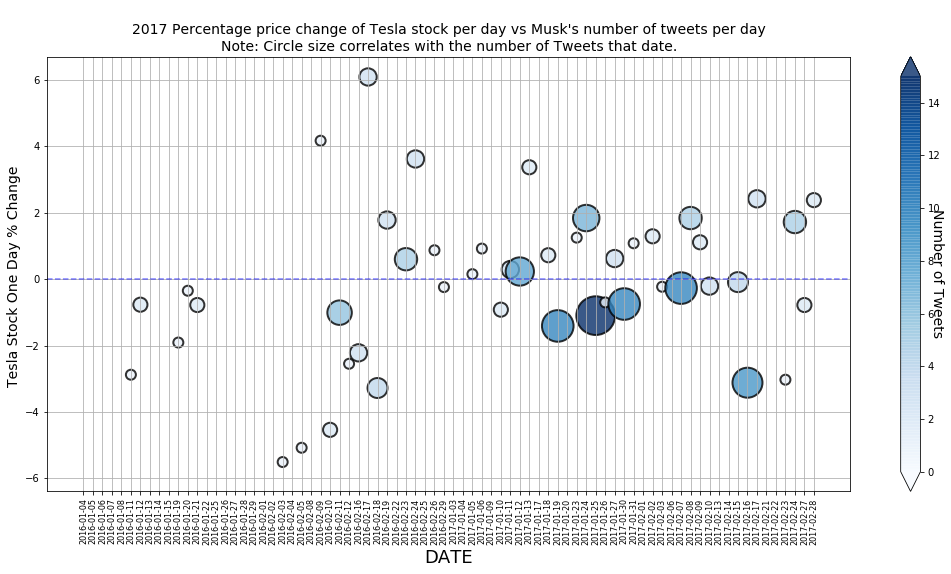

In [238]:
#x=date  y = tweet count    s=%change= size of the bubble
# Scatter Plot Temperature (F) vs. Latitude
fig, ax = plt.subplots(figsize=(18,8))

# plt.figure(figsize=(16,8))
x = np.arange(len(production_2016))
s = production_2016["Tweet Count"]
y = production_2016["percentage change"]
colors = production_2016["Tweet Count"]

# Change color with c and alpha. I map the color to the X axis value.
plot = plt.scatter(x, y, c=colors, s=s*100, cmap="Blues", alpha=0.8, edgecolors="black", linewidth=2)

plt.xticks(x,production_2016["date_only"],rotation=90,fontsize=8)
plt.xlabel("DATE", fontsize=18)
plt.ylabel("Tesla Stock One Day % Change ", fontsize=14)
plt.title("\n2017 Percentage price change of Tesla stock per day vs Musk's number of tweets per day" + "\nNote: Circle size correlates with the number of Tweets that date.", fontsize=14)
plt.axhline(y=0,color='b', linestyle='--', alpha=0.5)
plt.grid() # vertical lines
cbar = plt.colorbar(plot, extend='both')   #display color bar
cbar.ax.set_ylabel('Number of Tweets', rotation=270, fontsize = 14)

# plt.ylim(-0.05, 0.06)
# plt.show()
plt.savefig("MuskPlot-16.png")